# Learning Keras

## Loading the Dataset

In [63]:
import numpy as np
import pandas as pd
df = pd.read_csv("./march_madness.csv")
print(df.head(1))


   TeamID  Points_mean  Poss_mean    OE_mean     DE_mean   FGM_mean  \
0  1101.0    71.192308  71.528846  99.892198  104.809578  25.384615   

    FGA_mean  FGM3_mean  FGA3_mean   FTM_mean  ...  OppStl_stdev  \
0  58.346154   6.692308       19.5  13.730769  ...      2.434953   

   OppBlk_stdev  OppFouls_stdev  rpi_avg  rpi_count  rpi_last    WinPct  \
0      2.112586        4.630105    999.0        0.0     999.0  0.346154   

       SOS       SOV  Seed  
0  0.52223  0.396363   NaN  

[1 rows x 70 columns]


In [2]:
input_columns = ['Points_mean', 'Poss_mean', 'OE_mean', 'DE_mean', 'FGM_mean',
       'FGA_mean', 'FGM3_mean', 'FGA3_mean', 'FTM_mean', 'FTA_mean', 'OR_mean',
       'DR_mean', 'Ast_mean', 'TO_mean', 'Stl_mean', 'Blk_mean', 'Fouls_mean',
       'OppPoints_mean', 'OppFGM_mean', 'OppFGA_mean', 'OppFGM3_mean',
       'OppFGA3_mean', 'OppFTM_mean', 'OppFTA_mean', 'OppOR_mean',
       'OppDR_mean', 'OppAst_mean', 'OppTO_mean', 'OppStl_mean', 'OppBlk_mean',
       'OppFouls_mean', 'Points_stdev', 'Poss_stdev', 'OE_stdev', 'DE_stdev',
       'FGM_stdev', 'FGA_stdev', 'FGM3_stdev', 'FGA3_stdev', 'FTM_stdev',
       'FTA_stdev', 'OR_stdev', 'DR_stdev', 'Ast_stdev', 'TO_stdev',
       'Stl_stdev', 'Blk_stdev', 'Fouls_stdev', 'OppPoints_stdev',
       'OppFGM_stdev', 'OppFGA_stdev', 'OppFGM3_stdev', 'OppFGA3_stdev',
       'OppFTM_stdev', 'OppFTA_stdev', 'OppOR_stdev', 'OppDR_stdev',
       'OppAst_stdev', 'OppTO_stdev', 'OppStl_stdev', 'OppBlk_stdev',
       'OppFouls_stdev', 'rpi_avg', 'rpi_count', 'rpi_last', 'WinPct', 'SOS',
       'SOV']
output_column = 'Seed'

X = df[input_columns]
Y = df[output_column].apply(lambda x: int(x)-1 if pd.notna(x) else 16) # Seed Index, Else 16

## Data Pre-Processing

In [52]:
from sklearn.preprocessing import StandardScaler
X_scaled = pd.DataFrame()

for column in input_columns:
    scaled_column = pd.DataFrame(StandardScaler().fit_transform(np.array(X[column]).reshape(-1,1)), columns=[column])
    X_scaled = pd.concat([X_scaled, scaled_column], axis=1)

## Basic Model
Sinlge Input: array of numeric stats

Single Output: seed index: 0-16 where

0=1 seed -> 15=16 seed

16 = miss tournament

In [75]:
from keras.layers import Input, Dense
from keras.models import Model

num_inputs, num_classes = len(input_columns), 17
# Input Layer
input_layer = Input(shape=(num_inputs,), name = "team_features")
# Hidden Layer
hidden_1 = Dense(32, activation="relu")(input_layer)
hidden_2 = Dense(17, activation="relu")(hidden_1)
# Output
predications = Dense(num_classes, activation="softmax")(hidden_2)
model = Model(inputs = input_layer, outputs=predications)
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics= ["accuracy"])


# Fitting the Model

In [76]:
import tensorflow as tf

tf.config.run_functions_eagerly(True)
## Convert X_scaled to input numpy array [(f1, f2, ..), (f1,f2, ....)]
## Convert Y to output numpy array [[16], [0], [3], ...]
history = model.fit(np.array(X_scaled), np.array(Y), epochs = 50, verbose=0)


/Users/andrewgrowney/.pyenv/versions/3.9.10/envs/nlu/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


[0.03030303120613098, 0.1542699784040451, 0.4490358233451843, 0.705234169960022, 0.7988981008529663, 0.8099173307418823, 0.8126721978187561, 0.8126721978187561, 0.8126721978187561, 0.8126721978187561, 0.8126721978187561, 0.8126721978187561, 0.8126721978187561, 0.8126721978187561, 0.8154270052909851, 0.8154270052909851, 0.8181818127632141, 0.8181818127632141, 0.8181818127632141, 0.8209366202354431, 0.8236914873123169, 0.8264462947845459, 0.8374655842781067, 0.8402203917503357, 0.8402203917503357, 0.8429751992225647, 0.8512396812438965, 0.8595041036605835, 0.8650137782096863, 0.8622589707374573, 0.8705233931541443, 0.8787878751754761, 0.8870523571968079, 0.8870523571968079, 0.8925619721412659, 0.9008264541625977, 0.9090909361839294, 0.9146005511283875, 0.9228650331497192, 0.9311294555664062, 0.944903552532196, 0.942148745059967, 0.944903552532196, 0.944903552532196, 0.9531680345535278, 0.9586777091026306, 0.9641873240470886, 0.9696969985961914, 0.9696969985961914, 0.9724518060684204]


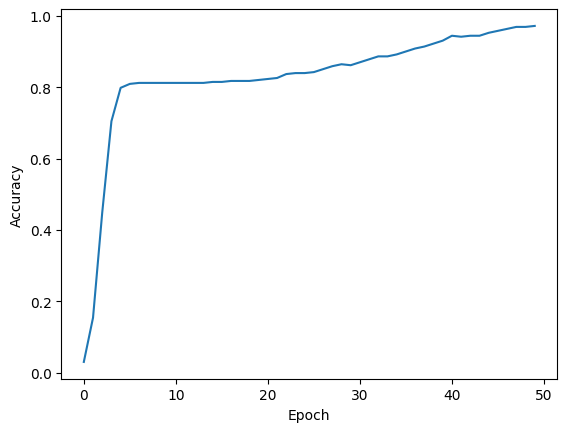

In [77]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

# Make Predictions

In [61]:
# Select a random row to predict for
# pred_in = np.random.random(size=(1,68))
pred_index = 3
pred_in = np.array(X_scaled.values[pred_index]).reshape(1, 68)
res = model.predict(pred_in)[0]

# Output Formatting
for (seed_idx, prob) in enumerate(res):
    seed = (seed_idx + 1) if seed_idx < 16 else "Miss Tournament"
    print(f"{seed}: {round(prob*100, 2)}")


1/1 [==============================] - 0s 20ms/step
1: 93.95
2: 0.51
3: 0.02
4: 0.0
5: 0.16
6: 0.0
7: 0.56
8: 0.08
9: 0.03
10: 0.0
11: 0.17
12: 0.27
13: 0.0
14: 0.02
15: 0.13
16: 0.7
Miss Tournament: 3.4


/Users/andrewgrowney/.pyenv/versions/3.9.10/envs/nlu/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
